## PCA

#### Short summary of notebook

Principal Component Analysis, PCA, is a mathematical technique used for dimensionality reduction. Its goal is to reduce the number of features whilst keeping most of the original information.

not used for: 
- nonlinear distributions,
- clustered distributions.

Why use PCA?
- **Reduces training time** — due to smaller dataset
- **Removes noise** — by keeping only what’s relevant
- **Makes visualization possible** — in cases where you have a maximum of 3 principal components

#### What are principal components?

Principal components form a set of linear independent vectors, pointing into the direction of the largest variance. The corresponding eigenvalue quantifies the amount of variance in that direction of the dataset.

To plot principal components, those eigenvectors can first be normalized and than scaled by the eigenvector (or its squareroot) to indicate the amount of variance (or the standard deviation) in that direction.


#### Pseudo Code

Step 1: Calculate the Correlation matrix data consisting of n dimensions. 
				The Correlation matrix will be of shape n*n.

Step 2: Calculate the Eigenvectors and Eigenvalues of this matrix.

Step 3: Take the first k-eigenvectors with the highest eigenvalues.

Step 4: Project the original dataset into these k eigenvectors resulting 
				in k dimensions where k ≤ n.

source: https://towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d

Imports

In [8]:
import pandas as pd
import numpy as np
import os

loading datasets

In [9]:
df = pd.read_csv(
            "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
            delimiter=";")
cols =  df.columns

print(df.head())
target_feature = 'quality'


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Standarize X in respect to its features, compute cov matrix & compute eigenvalues

In [10]:
# standarize the data respecting its features
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
print("df scaled", df[:5])

# Compute the covariance matrix and store it into covar
features = df.T
#print("features", features[:5])

covar = np.cov(features)
print("covar", covar[:5])

#assert covar.shape == (5, 11)

# Compute the eigenvalues and eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
eigenval, eigenvec = np.linalg.eig(covar)
print(eigenval[:5])
print(eigenvec[:5])

#assert eigenval.shape == (11,)
#assert eigenvec.shape == (11, 11)
for ev in eigenvec: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

df scaled [[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611 -0.78782264]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711 -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711 -0.78782264]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711  0.45084835]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611 -0.78782264]]
covar [[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686  0.12412928]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0

(array([0.76188411, 0.43148038, 0.06500967, 0.03687918, 0.0063239 ,
        0.02668452, 0.02123592]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <matplotlib.lines.Line2D at 0x2611c031ad0>)

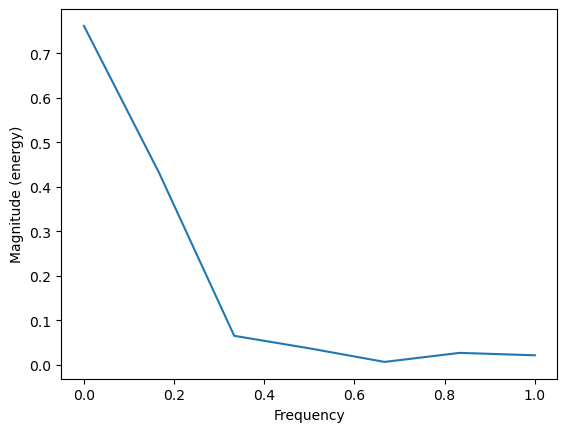

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# sort eigenval by mag in descending order
eigenval[::-1].sort()

# plot eigenvalues
plt.magnitude_spectrum(eigenval) 

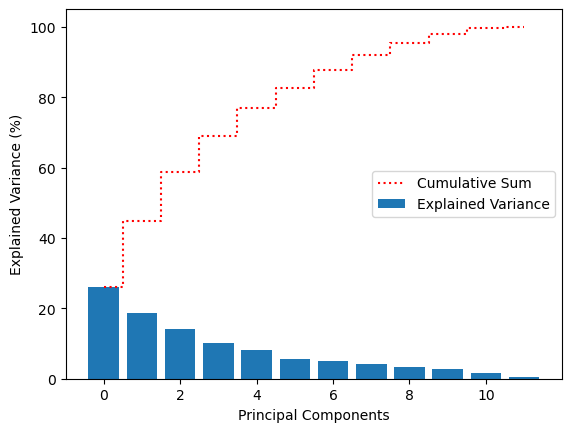

In [12]:
var_exp = [val*100/sum(eigenval) for val in eigenval]
cum_sum = np.cumsum(var_exp)

plt.bar(range(len(eigenval)), var_exp, label='Explained Variance')
plt.step(range(len(eigenval)), cum_sum, 'r:',
         where='mid', label='Cumulative Sum')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.legend(loc='center right')


[ 0.          0.          0.99397072 -3.54344711]
fixed acidity
[ 0.          0.          0.27008483 -0.96283653]
[ 0.          0.          0.99997372 -0.00724921]
1.2900659127534393
73.91533209446436
volatile acidity
[ 0.          0.          0.27008483 -0.96283653]
[ 0.          0.         -0.67820671  0.73487119]
2.669754193800146
152.9656476421
citric acid
[ 0.          0.          0.27008483 -0.96283653]
[ 0.          0.          0.97106256 -0.23882527]
1.0561592552744221
60.513467820904516
residual sugar
[ 0.          0.          0.27008483 -0.96283653]
[0.        0.        0.6995141 0.7146188]
2.093394192104118
119.94265206476464
chlorides
[ 0.          0.          0.27008483 -0.96283653]
[0.         0.         0.77526918 0.63163099]
1.980970374005797
113.50124177098436
free sulfur dioxide
[ 0.          0.          0.27008483 -0.96283653]
[ 0.          0.         -0.20423097  0.97892273]
3.07378957333658
176.11516966350408
total sulfur dioxide
[ 0.          0.          0.2700848

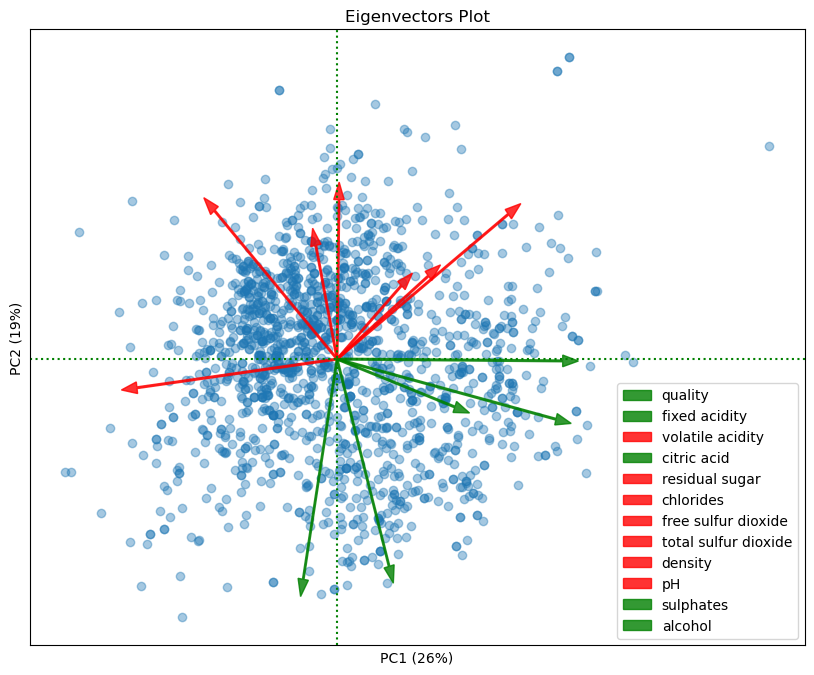

In [ ]:
# same without error
# Set the plot

plt.figure(figsize=(10,8))

plt.title('Eigenvectors Plot')
plt.axhline(0, color='green', linestyle=':')
plt.axvline(0, color='green', linestyle=':')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))


# plot centered projected data
proj = proj - np.mean(proj, axis=0)

plt.scatter(proj["PC1"], proj["PC2"], alpha=.4) # accessing via PC? directly

# scale eigenvectors
eigenvec_s = eigenvec * np.sqrt(eigenval)



# find target feature vector
target_feature_vec = np.array([0, 0, eigenvec_s[:,:2][11][0]*5, eigenvec_s[:,:2][11][1]*5]) #hardcoded bc i know idx of target feature
print(target_feature_vec)
plt.arrow(target_feature_vec[0], target_feature_vec[1], target_feature_vec[2], target_feature_vec[3], alpha=.8, 
            color="green", 
            width=0.03, head_width=.2, label= cols[idx])  
# plot other vectors according to their influence 
for idx, eivec in enumerate(eigenvec_s[:,:2]):
    if cols[idx] == target_feature: #skip target feature
        continue
    other_vec = np.array([0, 0, eivec[0]*5, eivec[1]*5])
    target_feature_vec = target_feature_vec / np.linalg.norm(target_feature_vec)
    other_vec = other_vec / np.linalg.norm(other_vec)
    angle_rad = np.arccos(np.dot(target_feature_vec, other_vec))
    print(cols[idx])

    print(target_feature_vec)
    print(other_vec)
    print(angle_rad)
    
    angle_deg = np.degrees(angle_rad)
    print(angle_deg)
    if angle_deg > 90:
        plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
            color="red",#plt.get_cmap("hot")(idx), 
            width=0.03, head_width=.2, label= cols[idx])   
    else: 
        plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
            color="green",#plt.get_cmap("summer")(idx), 
            width=0.03, head_width=.2, label= cols[idx])   
plt.legend()

plt.show()

## Conclusion